### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas_profiling
import seaborn as sns
import dateutil
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline

In [145]:
cd

/Users/krzysiekpilat


### Data

In [2]:
#Downland data
df = pd.read_csv('../data/companies.csv')
investor =  pd.read_csv('../data/investor.csv')
df.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (13,15,17,19,26,27,28,38,44,45,46,51,52,53,54,56,58,60,63,67,68,69,70,71,73,74,75,76,77,78,80,81,82,83,84,85,86,88,91,92,93,94,95,96,97,99,101,102,103,104,105,106,108,111,113,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2,5,9,54,55,56,58,59,113) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(498402, 118)

In [3]:
#Drop Duplication
df = df.loc[:,~df.columns.duplicated()].drop_duplicates()
investor = investor.loc[:,~investor.columns.duplicated()].drop_duplicates()
#Columns standarization
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_')
investor.columns = investor.columns.str.lower().str.strip().str.replace(' ','_')
print(df.shape)
print(investor.shape)

(411467, 118)
(53409, 119)


### Mising data

In [4]:
#Check missing value
((df.notnull().sum().sort_values().head(60))/len(df))*100# 

accelerator_application_deadline                  0.028921
accelerator_duration_(in_weeks)                   0.029893
accelerator_program_type                          0.033296
number_of_alumni                                  0.060758
number_of_diversity_investments                   0.061001
delisted_date                                     0.090165
cb_rank_(school)                                  0.113739
delisted_date_precision                           0.162346
valuation_at_ipo_currency_(in_usd)                0.234041
valuation_at_ipo_currency                         0.234041
valuation_at_ipo                                  0.234041
investment_stage                                  0.250567
number_of_exits_(ipo)                             0.372083
number_of_exits                                   0.372083
money_raised_at_ipo                               0.383263
money_raised_at_ipo_currency_(in_usd)             0.383263
money_raised_at_ipo_currency                      0.3832

(411467, 118)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


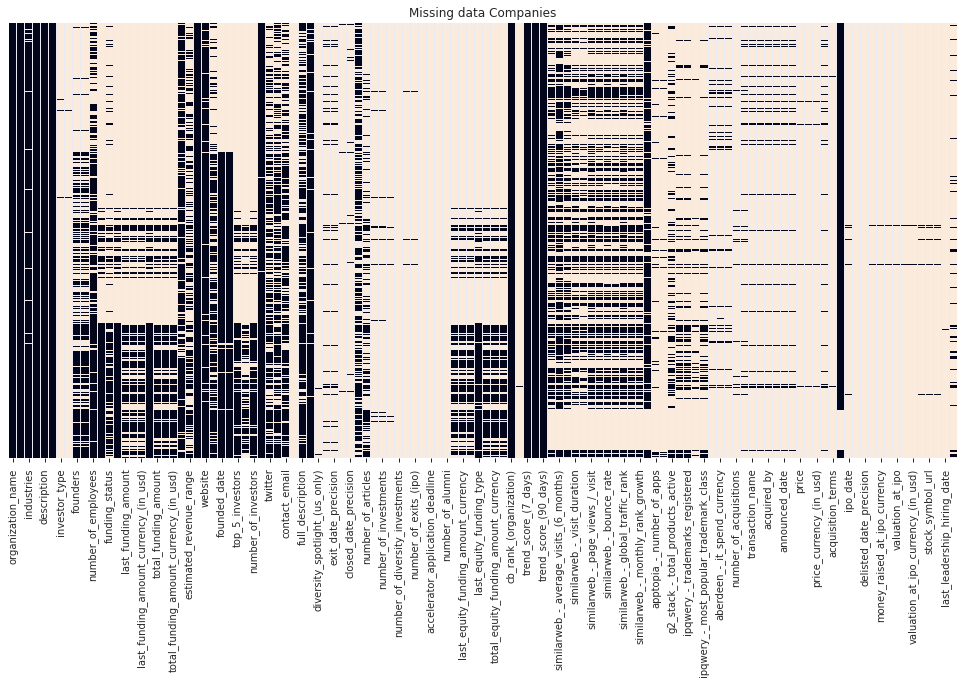

In [5]:
print(df.shape)
fig, ax = plt.subplots(figsize=(17,8))
ax = sns.heatmap(df.isnull(), cbar=False)
ax.set_yticks([])
ax.set_title("Missing data Companies")
plt.show()

In [6]:
#Drop columns with missing value <84% TODO rozpisz 
clean_df=df[df.columns[df.isnull().mean()<0.84]]

(411467, 63)


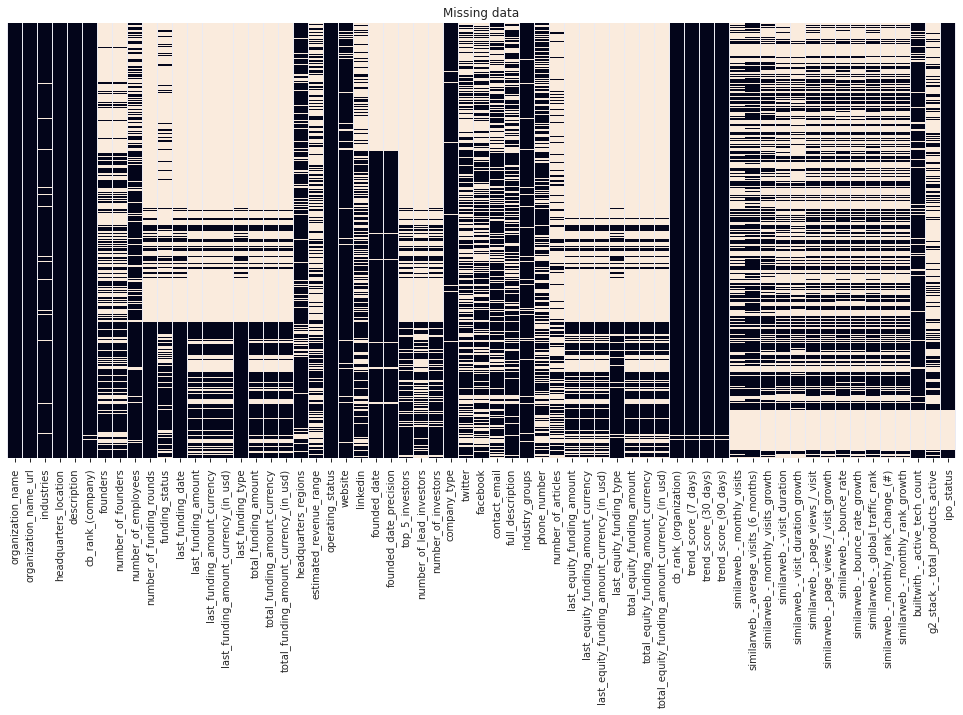

In [7]:
print(clean_df.shape)
fig, ax = plt.subplots(figsize=(17,8))
ax = sns.heatmap(clean_df.isnull(), cbar=False)
ax.set_yticks([])
ax.set_title("Missing data")
plt.show()

In [8]:
#Dropna columns
clean_df = clean_df.drop(columns = ['last_equity_funding_amount','last_equity_funding_amount_currency','total_equity_funding_amount','total_equity_funding_amount_currency',
                                   'last_funding_amount','last_funding_amount_currency','total_funding_amount','total_funding_amount_currency',])
#Check missing value
((clean_df.notnull().sum().sort_values().head(60))/len(clean_df))*100# 

number_of_lead_investors                          19.823704
last_equity_funding_amount_currency_(in_usd)      23.647826
total_equity_funding_amount_currency_(in_usd)     25.960041
last_funding_amount_currency_(in_usd)             26.312438
g2_stack_-_total_products_active                  26.337471
number_of_articles                                26.772013
total_funding_amount_currency_(in_usd)            29.034406
top_5_investors                                   30.154545
number_of_investors                               30.158433
funding_status                                    31.106018
similarweb_-_visit_duration_growth                33.037643
last_equity_funding_type                          34.255238
last_funding_type                                 37.767063
last_funding_date                                 37.767063
number_of_funding_rounds                          37.768521
founders                                          39.409479
number_of_founders                      

### Feature engineering

In [9]:
#Replace missing data with #POPRAW
clean_df = clean_df.fillna(0)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411467 entries, 0 to 491510
Data columns (total 55 columns):
organization_name                                411467 non-null object
organization_name_url                            411467 non-null object
industries                                       411467 non-null object
headquarters_location                            411467 non-null object
description                                      411467 non-null object
cb_rank_(company)                                411467 non-null object
founders                                         411467 non-null object
number_of_founders                               411467 non-null float64
number_of_employees                              411467 non-null object
number_of_funding_rounds                         411467 non-null float64
funding_status                                   411467 non-null object
last_funding_date                                411467 non-null object
last_funding_amount_cur

### Split singel column to columns


In [10]:
#location
new = clean_df['headquarters_location'].str.split(',',n=4,expand =True)
# City
clean_df['n_city'] = new[0]
# Country
clean_df['n_country'] = new[2]
#continent
clean_df['n_continent']=new[3]

#Droping organization location
clean_df.drop(columns=['headquarters_location'], inplace=True)

In [11]:
top = clean_df['top_5_investors'].str.split(',',n=5,expand = True)
#vc_1
clean_df['vc_1'] = top[0]
#vc_2
clean_df['vc_2'] = top[1]
#vc_3
clean_df['vc_3'] = top[2]
#vc_4
clean_df['vc_4'] = top[3]
#vc_5
clean_df['vc_5'] = top[4]

#Droping top_5_investor 
clean_df.drop(columns=['top_5_investors'], inplace=True)

In [12]:
vc=investor[['organization/person_name','cb_rank_(investor)']]
vc = vc.drop_duplicates()
vc = pd.Series(vc['cb_rank_(investor)'].values,index=vc['organization/person_name']).to_dict()
#vc = vc.set_index('organization/person_name')
#vc=vc.to_dict('split')

In [38]:
clean_df['vc_1'] = clean_df['vc_1'].map(vc)

In [40]:
clean_df[~clean_df['vc_1'].isna()].head()

,organization_name,organization_name_url,industries,description,cb_rank_(company),founders,number_of_founders,number_of_employees,number_of_funding_rounds,funding_status,...,g2_stack_-_total_products_active,ipo_status,n_city,n_country,n_continent,vc_1,vc_2,vc_3,vc_4,vc_5
153227,BIL24,https://www.crunchbase.com/organization/bil24,"E-Commerce, Event Management, Events, Ticketing",BIL24 is a ticket platform that sells tickets ...,"194,987",0,0.0,1-10,0.0,0,...,0,Private,Russia,United States,None,390,None,None,None,None
177121,Andela,https://www.crunchbase.com/organization/andela,"B2B, Consulting, Human Resources, Information ...",Andela is a global talent network that connect...,136,"Brice Steven Nkengsa, Christina Sass, Ian Carn...",6.0,1001-5000,9.0,Late Stage Venture,...,75,Private,New York,United States,None,120,Spark Capital,Omidyar Network,International Finance Corporation,GV
177122,Niantic,https://www.crunchbase.com/organization/nianti...,"Augmented Reality, Internet, Software, Video G...",Niantic builds augmented reality platform for ...,205,"John Hanke, Phil Keslin",2.0,101-250,4.0,Late Stage Venture,...,10,Private,San Francisco,United States,None,145,CRV,IVP,aXiomatic,Nintendo
177123,Riot Games,https://www.crunchbase.com/organization/riot-g...,"Computer, Developer Platform, PC Games, Video ...",Riot Games is a global company that develops o...,404,"Brandon Beck, Marc Merrill",2.0,1001-5000,5.0,M&A,...,39,Private,Los Angeles,United States,None,51,Benchmark,HAX,FirstMark,None
177124,Infor,https://www.crunchbase.com/organization/infor,"Cloud Data Services, Database, Enterprise Soft...",Infor provides enterprise software and service...,452,Jim Schaper,1.0,10001+,4.0,M&A,...,65,Private,New York,United States,None,120,Summit Partners,Golden Gate Capital,Koch Equity Development,None


In [321]:
a=clean_df['vc_1'].replace({'vc_1':vc})

In [330]:
a[~a.isna()][40:100]

177160                       RRE Ventures
177161               Eight Roads Ventures
177162                       500 Startups
177163                       Y Combinator
177164                   Insight Partners
177165                  Playground Global
177166                      East Ventures
177167                Salesforce Ventures
177168                    Austin Ventures
177169                     Anthemis Group
177170                          Portfolia
177171                                14W
177172                   Polaris Partners
177173                         e.ventures
177174                     Social Capital
177175              Madrona Venture Group
177176                   Verizon Ventures
177177                    Sequoia Capital
177178      StartX (Stanford-StartX Fund)
177179                          Techstars
177180                         Revolution
177181                             Verily
177182                         Revolution
177183                          Mi

In [309]:
clean_df['vc_1'].value_counts(dropna=False)

NaN                                     287391
EASME - EU Executive Agency for SMEs      4403
Y Combinator                              2875
Techstars                                 2625
500 Startups                              1717
                                         ...  
Minor International                          1
UCCVR                                        1
Green Park Investment Partners               1
Nirmalesh Kumar Sampath Kumar                1
Stephan Goss                                 1
Name: vc_1, Length: 19370, dtype: int64

In [310]:
for key in vc:
    a= clean_df['vc_1'].map(vc[key]) 

TypeError: 'str' object is not callable

In [70]:
#Split industries
industries = pd.get_dummies(clean_df.industries.str.strip(',').str.split(',').str[0], prefix='ind')

#Drop some columns where valu is small 
industries.drop([col for col, val in industries.sum().iteritems() if val < 200], axis=1, inplace=True)

In [71]:
#merege dataset
clean_df= pd.concat([clean_df,industries], axis=1)